In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
kg = pd.read_csv('./DB/Food_Supply_Quantity_kg_Data.csv')
protein = pd.read_csv('./DB/Protein_Supply_Quantity_Data.csv')
kcal = pd.read_csv('./DB/Food_Supply_kcal_Data.csv')
fat = pd.read_csv('./DB/Fat_Supply_Quantity_Data.csv')
desc = pd.read_csv('./DB/Supply_Food_Data_Descriptions.csv')

In [3]:
col = kg.columns
input_col = col[1:24]
output_col = col[26:30]

In [4]:
for c in output_col :
    kg_notna = kg[kg[c].notna()]

In [5]:
kg_notna.drop(['Obesity','Undernourished','Unit (all except Population)'],axis=1,inplace=True)

C:\Users\ChangYup\Anaconda3\envs\yup01\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [6]:
input_kg = kg_notna[input_col]
output_kg = kg_notna['Recovered']/kg_notna['Confirmed']

In [7]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True)
reg.fit(input_kg,output_kg)

LinearRegression()

In [8]:
round(reg.score(input_kg,output_kg),2)

0.21

In [9]:
reg.coef_

array([107.24973379, 106.19974841, 117.19572865, 106.16906759,
       107.25518261, 106.19041951, 106.15250867, 107.25165198,
       106.14798785, 106.15862051, 107.24755795, 106.4134798 ,
       107.26701038, 107.21004529, 107.50451167, 107.25266495,
       107.27051064, 107.28039958, 107.28555478, 107.17522293,
       107.28917108, 107.26344448, 116.11285115])

In [10]:
kg.head()

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,...,6.7642,40.5645,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,...,11.7753,31.2304,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,...,11.6484,40.3651,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,...,2.3041,45.0722,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0,5.9960,0.2274,4.1489,10.7451,5.6888,...,5.4495,33.3233,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%


In [11]:
df = kg_notna[input_col]

In [12]:
df['Recovered']=kg_notna['Recovered']/kg_notna['Confirmed']

C:\Users\ChangYup\AppData\Local\Temp/ipykernel_27816/176695480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Recovered']=kg_notna['Recovered']/kg_notna['Confirmed']


In [13]:
df.head()

,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,...,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Recovered
0,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,7.5828,...,0.0574,0.8802,0.3078,1.3489,0.0,0.0770,0.5345,6.7642,40.5645,0.868010
1,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,15.7213,...,0.0008,1.8096,0.1055,1.5367,0.0,0.1515,0.3261,11.7753,31.2304,0.604130
2,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,7.6189,...,0.0557,4.1340,0.2216,1.8342,0.0,0.1152,1.0310,11.6484,40.3651,0.684256
3,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,0.8311,...,0.0009,18.1102,0.0508,1.8495,0.0,0.0061,0.6463,2.3041,45.0722,0.920895
4,3.5764,0.0087,16.6613,0.0,5.9960,0.2274,4.1489,10.7451,5.6888,6.3663,...,0.1524,1.4522,0.1564,3.8749,0.0,0.0253,0.8102,5.4495,33.3233,0.649306


In [79]:
# Recovered 변수의 평균이 0.78인데 0.8이상이면 회복률이 높은 그룹으로 지정 0.8보다 작으면 회복률이 낮은 그룹으로 지정
df['Recover_group'] = df['Recovered'].map(lambda x: 1 if x >=0.8 else 0)

In [48]:
from xgboost import plot_importance as xg_plot_importance
from xgboost import XGBClassifier

In [40]:
y = df['Recover_group']
x = df.drop(['Recovered','Recover_group'],axis=1)

In [30]:
y = df['Recovered']
x = df.drop(['Recovered','Recover_group'],axis=1)

In [36]:
df['Recovered'].mean()

0.7845719599801605

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=30)

In [42]:
def metrics(y_test, pred):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    print('정확도 : {0:.2f}, 정밀도 : {1:.2f}, 재현율 : {2:.2f}'.format(accuracy, precision, recall))
    print('f1-score : {0:.2f}, auc : {1:.2f}'.format(f1, roc_score))

In [53]:
evals = [(x_test,y_test)]
xgb = XGBClassifier(learning_rate=0.1,max_depth=4)
xgb.fit(x_train, y_train,early_stopping_rounds=100, eval_metric = "logloss", eval_set = evals, verbose = 1)
xgb_pred = xgb.predict(x_test)

[0]	validation_0-logloss:0.67116
[1]	validation_0-logloss:0.65709
[2]	validation_0-logloss:0.63892
[3]	validation_0-logloss:0.62573
[4]	validation_0-logloss:0.62289
[5]	validation_0-logloss:0.61019
[6]	validation_0-logloss:0.60540
[7]	validation_0-logloss:0.60000
[8]	validation_0-logloss:0.59992
[9]	validation_0-logloss:0.58934
[10]	validation_0-logloss:0.58845
[11]	validation_0-logloss:0.58052
[12]	validation_0-logloss:0.58242
[13]	validation_0-logloss:0.57393
[14]	validation_0-logloss:0.56442
[15]	validation_0-logloss:0.56368
[16]	validation_0-logloss:0.55831
[17]	validation_0-logloss:0.55473
[18]	validation_0-logloss:0.54890
[19]	validation_0-logloss:0.55266
[20]	validation_0-logloss:0.55069
[21]	validation_0-logloss:0.54955
[22]	validation_0-logloss:0.54864
[23]	validation_0-logloss:0.54322
[24]	validation_0-logloss:0.54342
[25]	validation_0-logloss:0.54231
[26]	validation_0-logloss:0.54353
[27]	validation_0-logloss:0.53924
[28]	validation_0-logloss:0.54004
[29]	validation_0-loglos

C:\Users\ChangYup\Anaconda3\envs\yup01\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[30]	validation_0-logloss:0.53807
[31]	validation_0-logloss:0.54089
[32]	validation_0-logloss:0.54806
[33]	validation_0-logloss:0.54819
[34]	validation_0-logloss:0.55159
[35]	validation_0-logloss:0.55268
[36]	validation_0-logloss:0.55295
[37]	validation_0-logloss:0.55004
[38]	validation_0-logloss:0.54790
[39]	validation_0-logloss:0.54891
[40]	validation_0-logloss:0.54450
[41]	validation_0-logloss:0.54604
[42]	validation_0-logloss:0.54253
[43]	validation_0-logloss:0.54401
[44]	validation_0-logloss:0.54988
[45]	validation_0-logloss:0.55208
[46]	validation_0-logloss:0.54992
[47]	validation_0-logloss:0.54974
[48]	validation_0-logloss:0.54746
[49]	validation_0-logloss:0.54587
[50]	validation_0-logloss:0.54436
[51]	validation_0-logloss:0.54530
[52]	validation_0-logloss:0.54519
[53]	validation_0-logloss:0.54740
[54]	validation_0-logloss:0.54582
[55]	validation_0-logloss:0.54671
[56]	validation_0-logloss:0.54778
[57]	validation_0-logloss:0.55517
[58]	validation_0-logloss:0.55074
[59]	validatio

In [54]:
metrics(y_test, xgb_pred)

정확도 : 0.70, 정밀도 : 0.75, 재현율 : 0.88
f1-score : 0.81, auc : 0.55


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

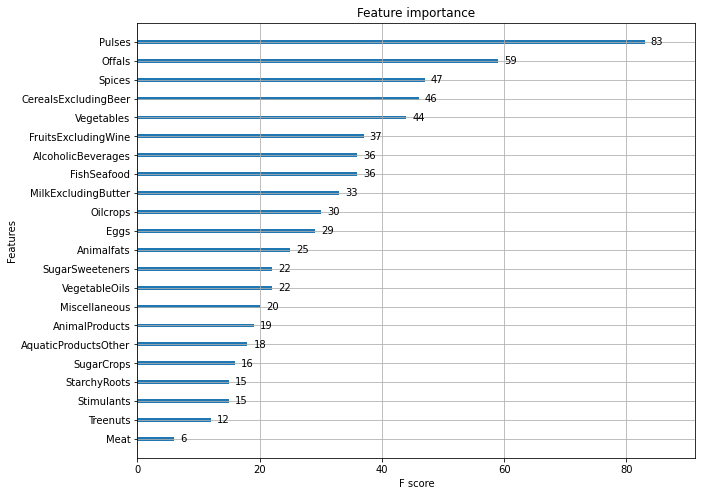

In [55]:
fig, ax = plt.subplots(figsize=(10,8))
xg_plot_importance(xgb, ax=ax)

In [56]:
from lightgbm import LGBMClassifier, plot_importance

In [57]:
import re
df = df.rename(columns=lambda x : re.sub('[^A-Za-z0-9_]+','',x))

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=30)
lgb = LGBMClassifier(n_estimaotrs = 100)
lgb.fit(x_train, y_train)

LGBMClassifier(n_estimaotrs=100)

In [65]:
lgb_pred = lgb.predict(x_test)
metrics(y_test, lgb_pred)

정확도 : 0.70, 정밀도 : 0.79, 재현율 : 0.79
f1-score : 0.79, auc : 0.62


In [66]:
lgb = LGBMClassifier(n_estimaotrs = 100)
evals = [(x_test, y_test)]
lgb.fit(x_train, y_train, early_stopping_rounds = 100, eval_metric = "logloss", eval_set = evals, verbose = True)

[LightGBM] [Warning] Unknown parameter: n_estimaotrs
[1]	valid_0's binary_logloss: 0.589234
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.58786
[3]	valid_0's binary_logloss: 0.581866
[4]	valid_0's binary_logloss: 0.570057
[5]	valid_0's binary_logloss: 0.578814
[6]	valid_0's binary_logloss: 0.58881
[7]	valid_0's binary_logloss: 0.577573
[8]	valid_0's binary_logloss: 0.574472
[9]	valid_0's binary_logloss: 0.585632
[10]	valid_0's binary_logloss: 0.591616
[11]	valid_0's binary_logloss: 0.584656
[12]	valid_0's binary_logloss: 0.587718
[13]	valid_0's binary_logloss: 0.582532
[14]	valid_0's binary_logloss: 0.575749
[15]	valid_0's binary_logloss: 0.584576
[16]	valid_0's binary_logloss: 0.587463
[17]	valid_0's binary_logloss: 0.589185
[18]	valid_0's binary_logloss: 0.594217
[19]	valid_0's binary_logloss: 0.596302
[20]	valid_0's binary_logloss: 0.593523
[21]	valid_0's binary_logloss: 0.599935
[22]	valid_0's binary_logloss: 0.601465
[23]	valid_0's b

LGBMClassifier(n_estimaotrs=100)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

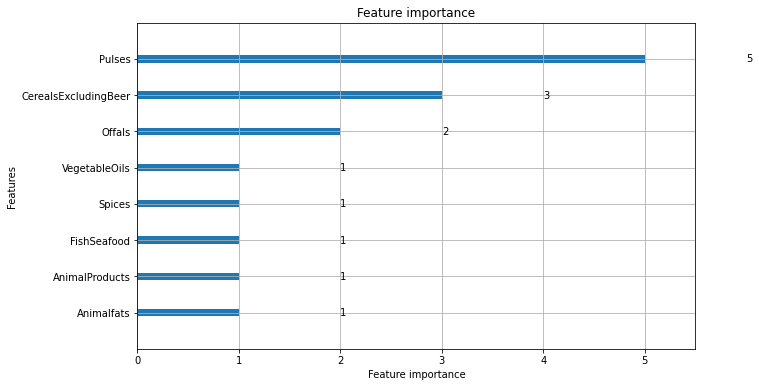

In [67]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_importance(lgb, ax = ax)

## 결과

* 회복에 긍정적인 영향 : <br>
* 회복에 부정적인 영향 :

In [69]:
df[['Pulses','CerealsExcludingBeer','Recover_group']].sort_values(by='Recover_group',ascending=False)[:20]

,Pulses,CerealsExcludingBeer,Recover_group
0,0.2953,24.8097,1
91,0.0399,5.1366,1
114,0.2847,7.3937,1
113,0.8311,10.9220,1
112,3.4838,22.2843,1
110,0.2414,7.7522,1
107,0.9107,18.1511,1
106,0.7298,9.9189,1
103,0.3306,18.7029,1
102,0.2113,5.0447,1


In [73]:
df[['Pulses','Offals','Spices','Recover_group']].sort_values(by='Recover_group',ascending=False)[:20]

,Pulses,Offals,Spices,Recover_group
0,0.2953,0.2057,0.0574,1
91,0.0399,0.1036,0.0586,1
114,0.2847,0.1773,0.1288,1
113,0.8311,0.0627,0.1715,1
112,3.4838,0.2022,0.0807,1
110,0.2414,0.1275,0.0495,1
107,0.9107,0.1536,0.4195,1
106,0.7298,0.2207,0.1266,1
103,0.3306,0.1949,0.1185,1
102,0.2113,0.1132,0.0175,1


In [78]:
isin_con = desc['Categories'].isin(['Pulses','Offals','Spices','Cereals - Excluding Beer'])
desc.loc[isin_con]

,Categories,Items
4,Cereals - Excluding Beer,"Barley and products; Cereals, Other; Maize and..."
11,Offals,"Offals, Edible"
13,Pulses,"Beans; Peas; Pulses, Other and products"
14,Spices,"Cloves; Pepper; Pimento; Spices, Other"


### 정확도는 높게 나오는데 중요한 변수라고 나오는 항목이랑 연관성을 못찾겠어요.........